## Loading Data

In [200]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets["num"]

# Convert to binary classification
y[y != 0] = 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

/var/folders/v5/_0ss5l5d6nz8d575gs5spbx40000gn/T/ipykernel_53380/3683227113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y != 0] = 1


In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        239 non-null    float64
 12  thal      240 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 26.5 KB


In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 179 to 184
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        60 non-null     float64
 12  thal      61 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 6.7 KB


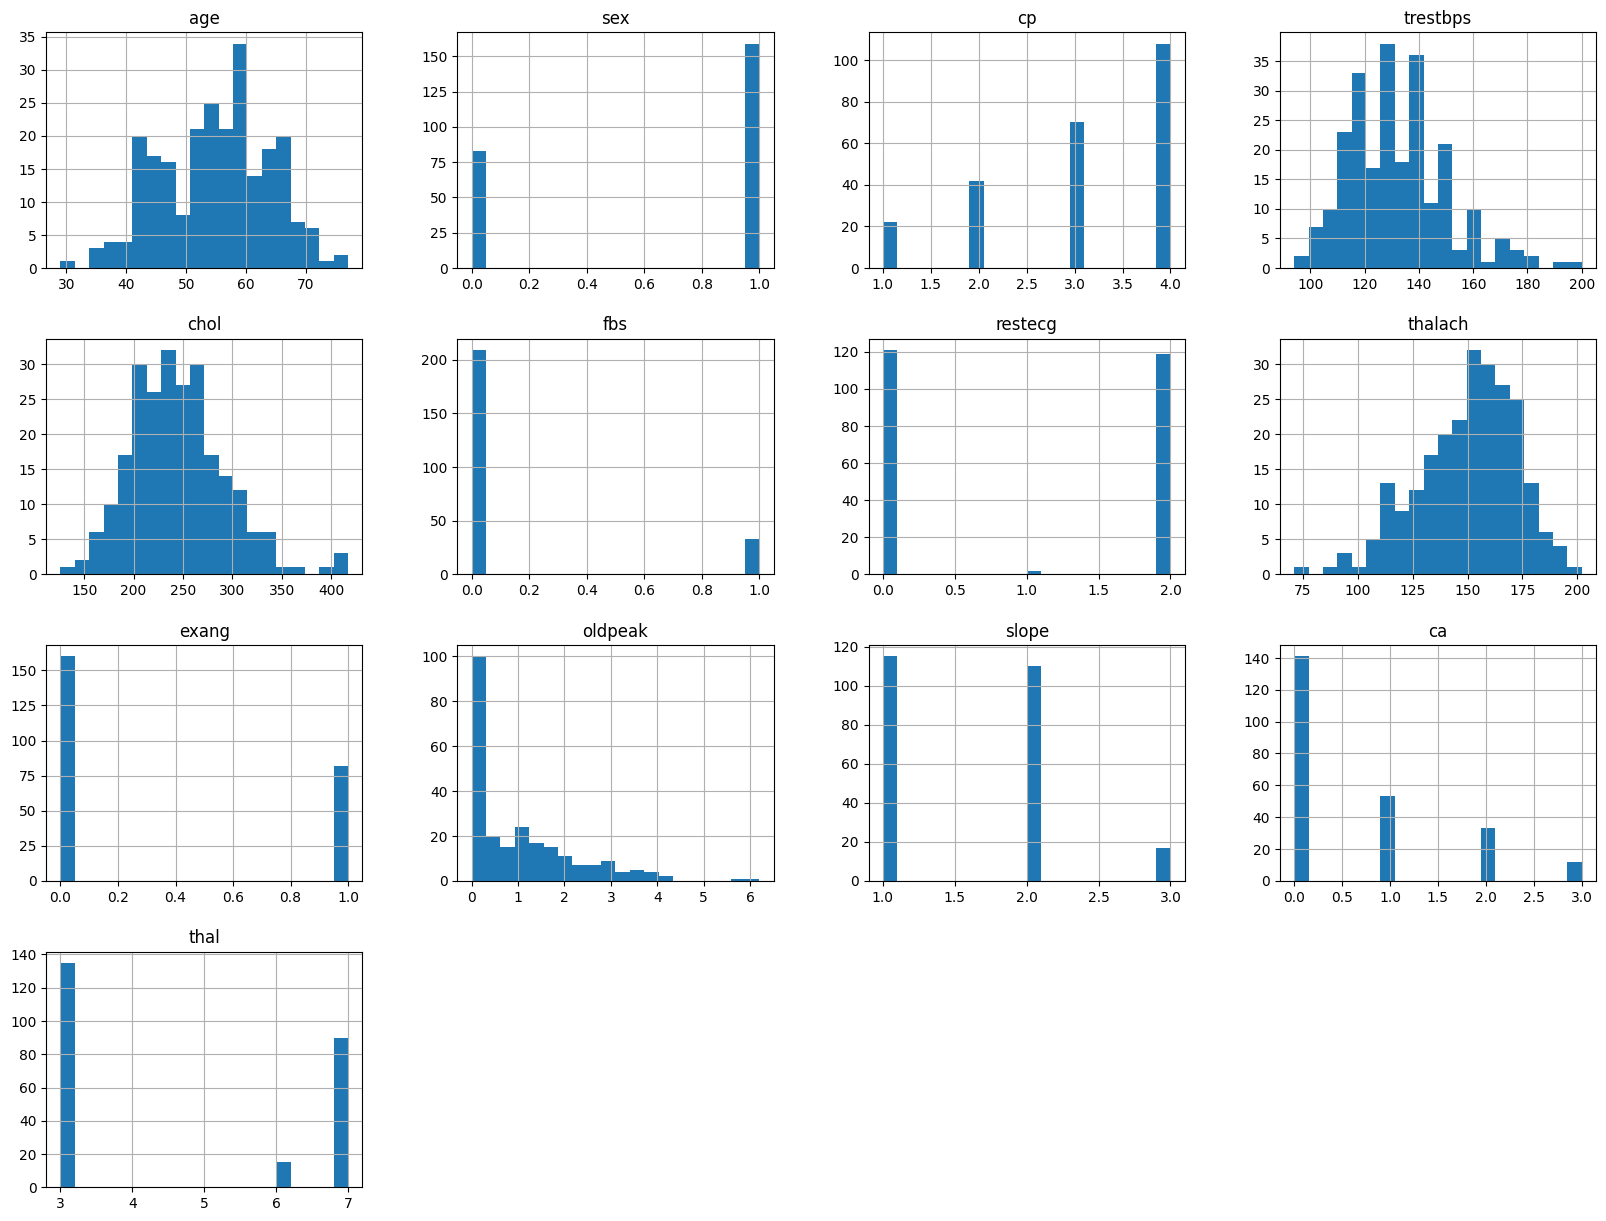

In [164]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(20,15))
plt.show()

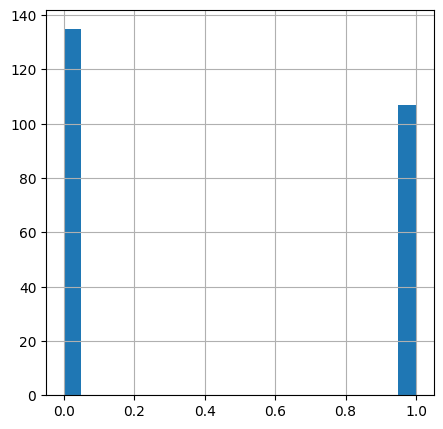

In [165]:
y_train.hist(bins=20, figsize=(5,5))
plt.show()

In [203]:
import pandas as pd

categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
integer_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Encodage des colonnes catégorielles
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, dummy_na=True, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, dummy_na=True, drop_first=False)

# Afficher le résultat
# Remove one-hot encoded columns with only one value
# For test set, remove columns that are not in train set
X_train_encoded = X_train_encoded.loc[:, X_train_encoded.apply(pd.Series.nunique) > 1]
X_test_encoded = X_test_encoded[X_train_encoded.columns]


X_train_encoded.T

,132,202,196,75,176,59,93,6,177,30,...,87,214,121,302,20,188,71,106,270,102
age,29,57,69,65,52,51,44,62,56,69,...,53,52,63,38,64,54,67,59,61,57
trestbps,130,150,160,160,108,125,108,140,132,140,...,128,112,150,138,110,192,125,140,140,128
chol,204,126,234,360,233,213,141,268,184,239,...,216,230,407,175,211,283,254,177,207,303
thalach,202,173,131,151,147,125,175,160,105,151,...,115,160,154,173,144,195,163,162,138,159
oldpeak,0.0,0.2,0.1,0.8,0.1,1.4,0.6,3.6,2.1,1.8,...,0.0,0.0,4.0,0.0,1.8,0.0,0.2,0.0,1.9,0.0
sex_0.0,False,False,False,True,False,False,True,True,False,True,...,True,False,True,False,False,False,False,False,False,True
sex_1.0,True,True,True,False,True,True,False,False,True,False,...,False,True,False,True,True,True,True,True,True,False
cp_1.0,False,False,True,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
cp_2.0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
cp_3.0,False,True,False,True,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False


## XGBoost-Pipeline

In [207]:
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


model = xgb.XGBClassifier(learning_rate=0.309467, n_estimators=801, max_depth=3, min_child_weight=3, colsample_bytree=0.658399, subsample=0.642807, gamma=0.761624, reg_alpha=1.135854, reg_lambda=97.30065)
model.fit(X_train, y_train)


y_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
tn, fp, fn, tp = cm_train.ravel()  # Décompose les valeurs de la matrice

# Calcul des métriques
accuracy = accuracy_score(y_train, y_pred)
sensitivity = recall_score(y_train, y_pred)  # Rappel (ou sensibilité)
specificity = tn / (tn + fp)  # Calcul manuel de la spécificité
f1 = f1_score(y_train, y_pred)


print("Training:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}\n")


# Prédictions
y_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm_test.ravel()  # Décompose les valeurs de la matrice

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Rappel (ou sensibilité)
specificity = tn / (tn + fp)  # Calcul manuel de la spécificité
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print(("Test:"))
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}")

Training:
Accuracy: 0.8760
Specificity: 0.9407
Sensitivity (Recall): 0.7944
F1-Score: 0.8500

Test:
Accuracy: 0.9016
Specificity: 0.9310
Sensitivity (Recall): 0.8750
F1-Score: 0.9032


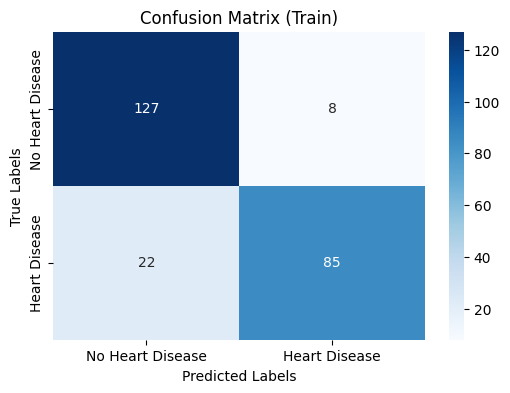

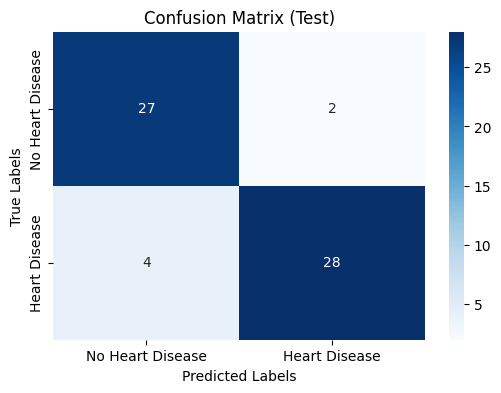

In [209]:
labels = ['No Heart Disease', 'Heart Disease']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Train)')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test)')
plt.show()